# Copyright
<pre>
Jelen forráskód a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott
"Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.

A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A forráskódot GPLv3 licensz védi. Újrafelhasználás esetén lehetőség szerint kérjük
az alábbi szerzőt értesíteni.

2021 (c) Csapó Tamás Gábor (csapot kukac tmit pont bme pont hu),
Gyires-Tóth Bálint, Zainkó Csaba


Original Convolutional AutoEncoder example from:

Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
    [Keras Convolutional AutoEncoder] https://blog.keras.io/building-autoencoders-in-keras.html
    [Autoencoder] https://colab.research.google.com/github/rickwierenga/notebooks/blob/master/autoencoders.ipynb
</pre>

In [1]:
from tensorflow import keras

In [2]:
# MNIST mérete: 28x28

# encoder rész
encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
])

# itt (3 x 3 x 64) azaz 576-dimenziós reprezentáció

# szóban:
# adat tömörítésre nem túl jó...
# de felügyelet nélküli előtanítás pl. osztályozóhoz, ha kevés a címkézett adat
# mert az encoder hálózat első konvolúciós rétegei jellemzőkinyerést csinálnak

encoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [3]:
# decoder rész
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid", activation="relu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same", activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same"),
    keras.layers.Reshape([28, 28])
])

decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 7, 7, 32)          18464     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 14, 14, 16)        4624      
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 28, 28, 1)         145       
 Transpose)                                                      
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 23233 (90.75 KB)
Trainable params: 23233 (90.75 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [4]:
# modell a teljes AE-re
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.summary()

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3, 3, 64)          23296     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            23233     
                                                                 
Total params: 46529 (181.75 KB)
Trainable params: 46529 (181.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# tanítóadatok
from keras.datasets import mnist

(x_train, _) ,(x_test, _) = mnist.load_data()

print(x_train.shape, x_test.shape)

# teszt részt kettéválasztjuk még, hogy legyen külön validációs halmaz
from sklearn.model_selection import train_test_split
[x_test, x_valid] = train_test_split(x_test, test_size=0.5)

x_train = x_train / 255
x_valid = x_valid / 255
x_test = x_test / 255

print(x_train.shape, x_valid.shape, x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


In [6]:
# tanítás
autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_valid, x_valid))

Epoch 1/10
469/469 [==============================] - 19s 7ms/step - loss: 0.0259 - val_loss: 0.0122
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0045 - val_loss: 0.004

In [7]:
# néhány digiten encode és decode
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

157/157 [==============================] - 0s 2ms/step


In [8]:
# milyen méretű a háló közepe, a 'bottleneck'?
print(encoded_imgs.shape)

(5000, 3, 3, 64)


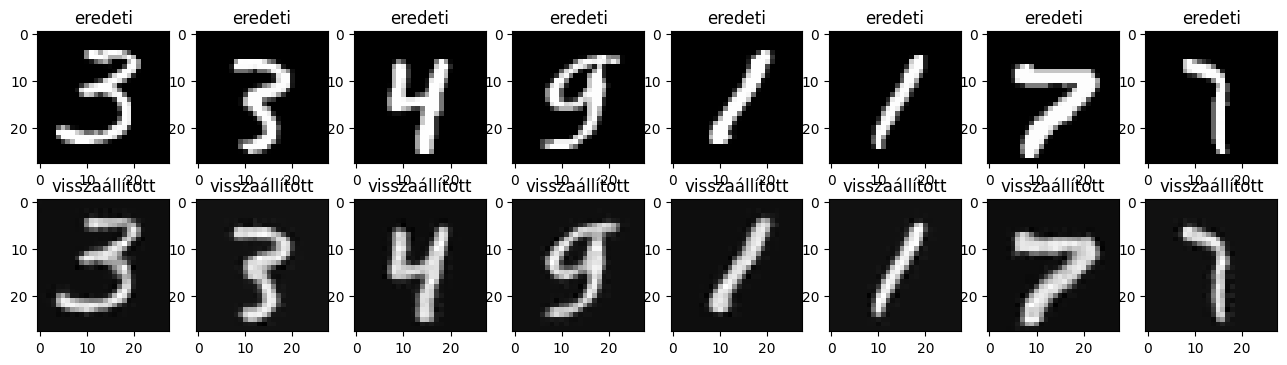

In [9]:
import matplotlib.pyplot as plt

# eredeti és visszaállított képek kirajzolása
n = 8
plt.figure(figsize=(16, 4))
for i in range(n):
  # eredeti
  ax = plt.subplot(2, n, i + 1)
  ax.set_title('eredeti')
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  # visszaállított
  ax = plt.subplot(2, n, i + 1 + n)
  ax.set_title('visszaállított')
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()

In [10]:
print(encoded_imgs[i].shape)

(3, 3, 64)


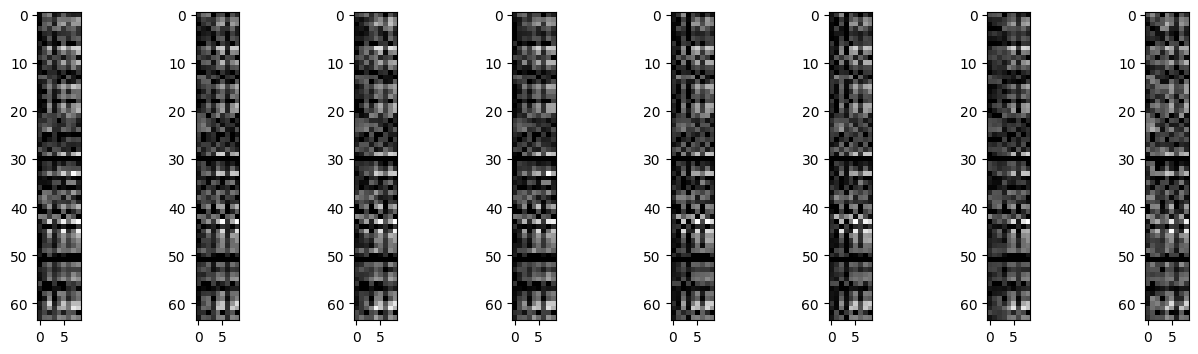

In [11]:
# encoder utáni eredmény, bottleneck reprezentáció
n = 8
plt.figure(figsize=(16, 4))
for i in range(n):
  # eredeti
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(encoded_imgs[i].reshape(3*3, 64).T)
  plt.gray()